In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier

from collections import Counter
import pickle
import warnings
warnings.filterwarnings('ignore')

In [97]:
census = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Features:
**- Categorical columns :**
- Workclass
- Education
- Marital_status
- Occupation
- Relationship
- Race
- Sex
- Native_country

**- Non-categorical columns:**
- Age
- Fnlwgt
- Education_num
- Capital_gain
- Capital_loss
- Hours_per_week

## Target:
- Income (Classification problem)

## EDA

In [99]:
census.shape

(32560, 15)

Shape of our dataset is 32560, 15

In [66]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**- Description of dataset.
(Showing description only for non-categorical columns)**
- Count.
- Mean.
- Standard deviation.
- Mininum
- 1st Quantile (25%)
- 2nd Quantile (50%)
- 3rd Quantile (75%)
- Maximum.

In [8]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**- Information of dataset.**
- RangeIndex: 0 to 32559
- Data columns: 15
- dtypes: int64(6), object(9)
- There are no nulls present in our dataset.

In [9]:
census.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in any of the columns, so we can proceed to the further step.

## Visualisation.

**- Bivariate Analysis.**

In [11]:
def plot(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=census)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between Income and Workclass


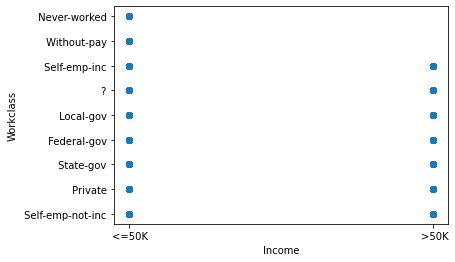

In [13]:
plot('Income','Workclass',data = census)

Workclass that have greater than 50k income.
- Self emp
- Private
- State gov
- Federal gov
- Local gov

Scatterpot between Income and Education


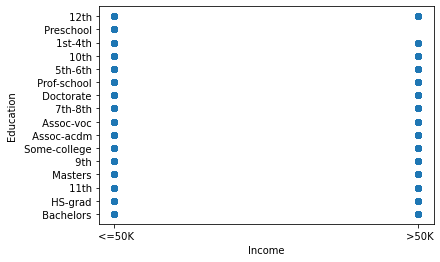

In [23]:
plot('Income','Education',data = census)

Only the education level of Preschool, cannot reach to more the 50k income.

Scatterpot between Income and Capital_gain


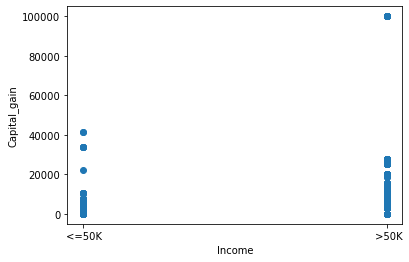

In [27]:
plot('Income','Capital_gain',data=census)

People whose captial gain is less than or equal to 40000, cannot reach to 50k of income.

Scatterpot between Income and Capital_loss


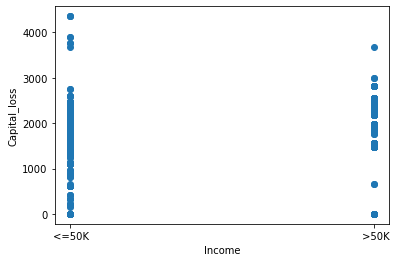

In [28]:
plot('Income','Capital_loss',data=census)

When the captial loss is more, income is less.

**- Columns without relation.**

Scatterpot between Income and Hours_per_week


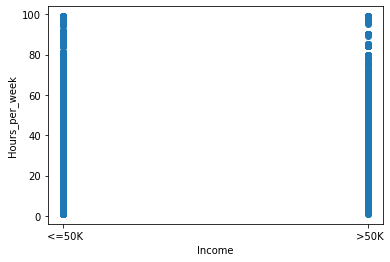

In [29]:
plot('Income','Hours_per_week',data = census)

Scatterpot between Income and Sex


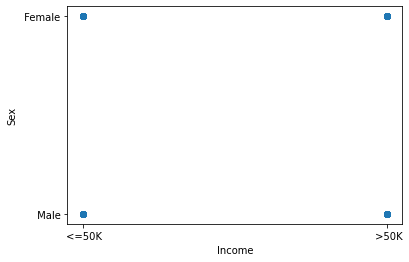

In [30]:
plot('Income','Sex',data = census)

Scatterpot between Income and Relationship


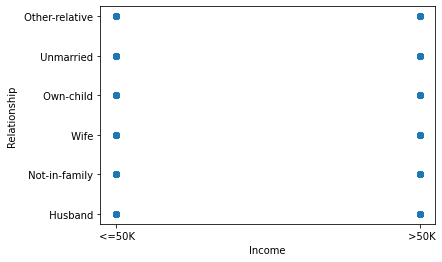

In [31]:
plot('Income','Relationship',data = census)

Scatterpot between Income and Occupation


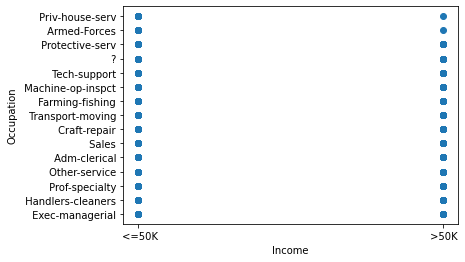

In [32]:
plot('Income','Occupation',data = census)

Scatterpot between Income and Race


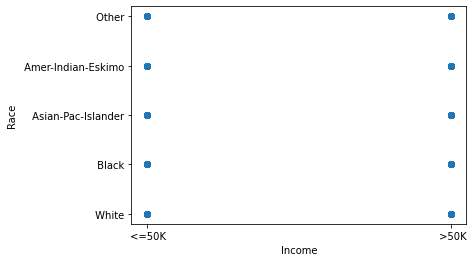

In [33]:
plot('Income','Race',data = census)

**- Univariate Analysis.**

<AxesSubplot:xlabel='count', ylabel='Race'>

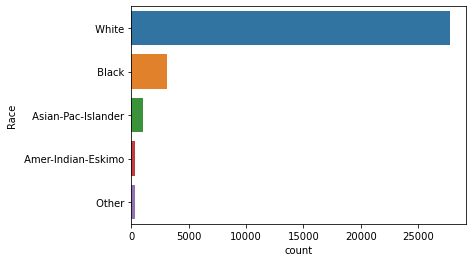

In [39]:
sns.countplot(y = census['Race'])

<AxesSubplot:xlabel='count', ylabel='Education'>

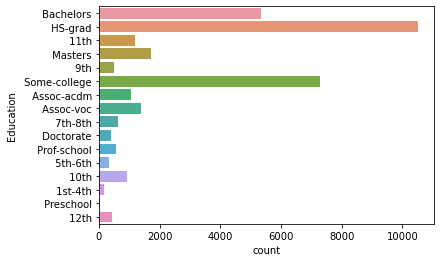

In [38]:
sns.countplot(y = census['Education'])

<AxesSubplot:xlabel='count', ylabel='Occupation'>

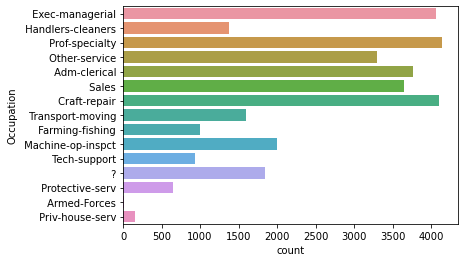

In [40]:
sns.countplot(y = census['Occupation'])

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

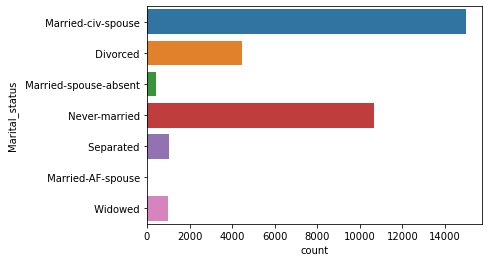

In [41]:
sns.countplot(y = census['Marital_status'])

<AxesSubplot:xlabel='count', ylabel='Workclass'>

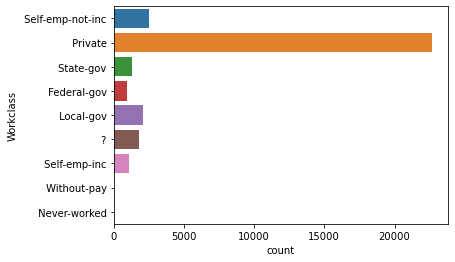

In [43]:
sns.countplot(y = census['Workclass'])

## Encoding

In [100]:
lb = LabelEncoder()
census['Workclass'] = lb.fit_transform(census['Workclass'])
census['Education'] = lb.fit_transform(census['Education'])
census['Marital_status'] = lb.fit_transform(census['Marital_status'])
census['Occupation'] = lb.fit_transform(census['Occupation'])
census['Relationship'] = lb.fit_transform(census['Relationship'])
census['Race'] = lb.fit_transform(census['Race'])
census['Sex'] = lb.fit_transform(census['Sex'])
census['Native_country'] = lb.fit_transform(census['Native_country'])

In [101]:
census['Income'] = lb.fit_transform(census['Income'])

In [102]:
census['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [103]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


After encoding, Every columns dtype is int64.

## Correlation.

In [69]:
df = census.corr()

<AxesSubplot:>

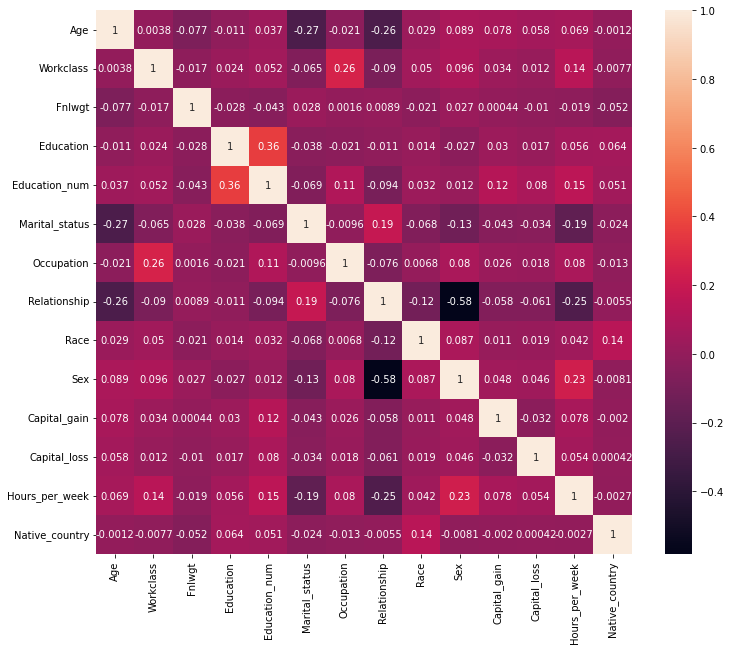

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df,annot = True)

There is no multicollinearity problem in our dataset.

## Normal Distribution & Outliers.

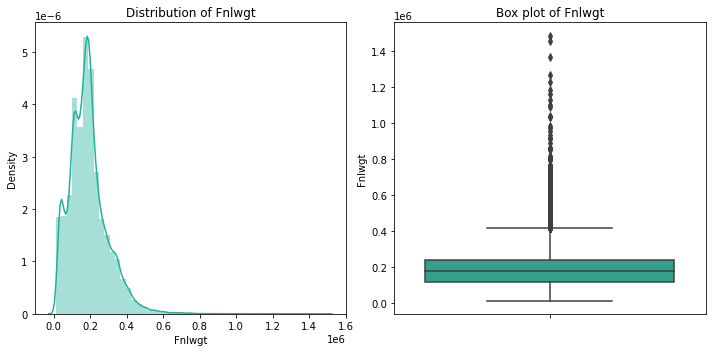

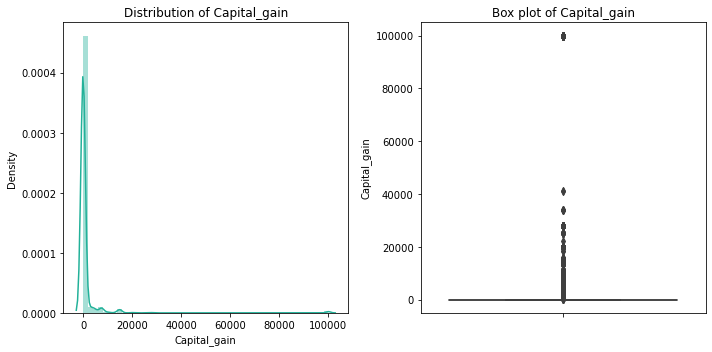

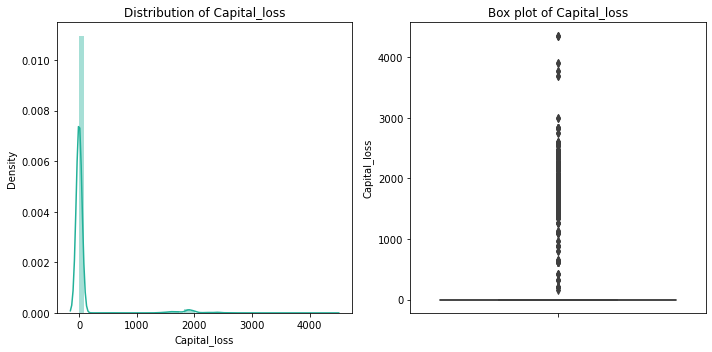

(32560, 15)


In [61]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(census[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=census[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['Fnlwgt','Capital_gain','Capital_loss']:
    check_outliers(i)
    
print(census.shape)

In [ ]:
'''def remove_outliers(x):
    global census
    Q1= census[x].quantile(0.25)
    Q3 = census[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(census[x] > upper_limit)
    census = census.drop(census.index[index])
    census.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(census[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=census[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['Fnlwgt','Capital_gain','Capital_loss']:
    remove_outliers(i)
print(census.shape)'''

Not removing the outliers and skweness because:
1. Leads to data leakage.
2. Capital_gain & Captial_loss columns become empty.
3. After removing, the final shape of our dataset is 27443, 15

## Features Selection

**- Seperating features and target column.**

In [105]:
x = census.drop('Income', axis = 1)
y = census.Income

**- Applying SelectKbest for the feature selection.**

In [107]:
best = SelectKBest(score_func = f_classif, k = 14)
fit = best.fit(x,y)
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [108]:
feat = pd.concat([score,column],axis = 1)
feat.columns = ['Score','Feature']
feat.nlargest(14,'Score')

,Score,Feature
4,4120.741694,Education_num
7,2187.696334,Relationship
0,1886.677918,Age
12,1813.339094,Hours_per_week
10,1709.157677,Capital_gain
9,1593.288816,Sex
5,1346.636300,Marital_status
11,754.777449,Capital_loss
3,206.095569,Education
6,186.393133,Occupation


**- Imbalance Target Column.**

<AxesSubplot:xlabel='Income', ylabel='count'>

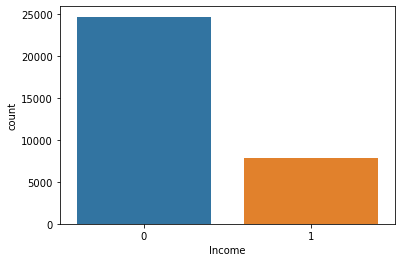

In [111]:
sns.countplot(y)

**- Using Upsampling technique to balance the target column(SMOTE).**

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 9)

In [126]:
Counter(y_train)

Counter({1: 5920, 0: 18500})

In [127]:
ove_smp = SMOTE(0.75)
x_train_os,y_train_os = ove_smp.fit_resample(x_train,y_train)

In [128]:
Counter(y_train_os)

Counter({1: 13875, 0: 18500})

<AxesSubplot:xlabel='Income', ylabel='count'>

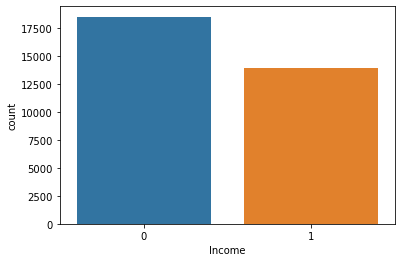

In [129]:
sns.countplot(y_train_os)

## Training the Model:

In [143]:
x = census.drop('Income', axis = 1)
y = census.Income

**- Using Standard scaler on features to scale the values.**

In [144]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train Test Split.**

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 8)

**- Creating The function for the training and testing, so that, we can get the results just by calling the function.**

In [147]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- Model Instantiating.**

In [152]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

**- KNeighbors Classifier.**

In [149]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.875020475020475

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     18539
           1       0.77      0.69      0.73      5881

    accuracy                           0.88     24420
   macro avg       0.84      0.81      0.82     24420
weighted avg       0.87      0.88      0.87     24420


 ----- Confusion matrix ----- 
 [[17332  1207]
 [ 1845  4036]]

 ----- Test Result ----- 

Accuracy Score: 0.828009828009828

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6180
           1       0.67      0.57      0.61      1960

    accuracy                           0.83      8140
   macro avg       0.77      0.74      0.75      8140
weighted avg       0.82      0.83      0.82      8140


 ----- Confusion matrix ----- 
 [[5624  556]
 [ 844 1116]]


**- Logistic Regression.**

In [150]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8244062244062244

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     18539
           1       0.72      0.45      0.55      5881

    accuracy                           0.82     24420
   macro avg       0.78      0.70      0.72     24420
weighted avg       0.81      0.82      0.81     24420


 ----- Confusion matrix ----- 
 [[17498  1041]
 [ 3247  2634]]

 ----- Test Result ----- 

Accuracy Score: 0.8282555282555283

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6180
           1       0.73      0.45      0.56      1960

    accuracy                           0.83      8140
   macro avg       0.79      0.70      0.73      8140
weighted avg       0.82      0.83      0.81      8140


 ----- Confusion matrix ----- 
 [[5862  318]
 [1080  880]]


**- AdaBoost Classifier.**

In [151]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8626945126945127

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     18539
           1       0.77      0.61      0.68      5881

    accuracy                           0.86     24420
   macro avg       0.83      0.78      0.80     24420
weighted avg       0.86      0.86      0.86     24420


 ----- Confusion matrix ----- 
 [[17498  1041]
 [ 2312  3569]]

 ----- Test Result ----- 

Accuracy Score: 0.86007371007371

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6180
           1       0.78      0.59      0.67      1960

    accuracy                           0.86      8140
   macro avg       0.83      0.77      0.79      8140
weighted avg       0.85      0.86      0.85      8140


 ----- Confusion matrix ----- 
 [[5850  330]
 [ 809 1151]]


**- RandomForest Classifier.**

In [153]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9999590499590499

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18539
           1       1.00      1.00      1.00      5881

    accuracy                           1.00     24420
   macro avg       1.00      1.00      1.00     24420
weighted avg       1.00      1.00      1.00     24420


 ----- Confusion matrix ----- 
 [[18538     1]
 [    0  5881]]

 ----- Test Result ----- 

Accuracy Score: 0.8571253071253071

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6180
           1       0.75      0.61      0.67      1960

    accuracy                           0.86      8140
   macro avg       0.82      0.77      0.79      8140
weighted avg       0.85      0.86      0.85      8140


 ----- Confusion matrix ----- 
 [[5783  397]
 [ 766 1194]]


                    RandomForest Classifier, is giving the best score among all.

## Hyperparameter Tuning.

In [155]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [166]:
param = {'n_estimators': range(1,100,10),
         'criterion': ['gini','entropy'],
         'max_depth': [10],
         'max_features': ['sqrt','log2'],
         'min_impurity_decrease':[0.0,0.1],
         'random_state':range(10,50,10)}

In [167]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'n_estimators': 41,
 'random_state': 20}

In [169]:
rf_hyp = RandomForestClassifier(criterion =  'gini' , max_depth = 10, max_features = 'sqrt', min_impurity_decrease = 0.0, n_estimators = 41, random_state = 20)

In [170]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8706388206388206

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     18539
           1       0.83      0.58      0.68      5881

    accuracy                           0.87     24420
   macro avg       0.86      0.77      0.80     24420
weighted avg       0.87      0.87      0.86     24420


 ----- Confusion matrix ----- 
 [[17861   678]
 [ 2481  3400]]

 ----- Test Result ----- 

Accuracy Score: 0.8552825552825553

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6180
           1       0.81      0.53      0.64      1960

    accuracy                           0.86      8140
   macro avg       0.84      0.74      0.77      8140
weighted avg       0.85      0.86      0.84      8140


 ----- Confusion matrix ----- 
 [[5931  249]
 [ 929 1031]]


     There is only small difference pre & post hyperparameter tuning. So we can take any of the parameters as a final model.

In [175]:
filename = 'census_classi.pickle'
pickle.dump(rf, open(filename, 'wb'))